히스토그램 (Histogram)

## 1. 기본 히스토그램 (Matplotlib)

### 1-1 기본 이해

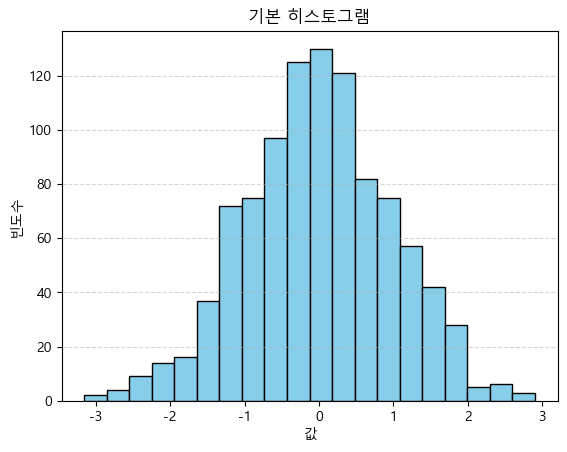

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 예시 데이터 생성
data = np.random.normal(loc=0, scale=1, size=1000)

# 히스토그램 그리기
plt.hist(data, bins=20, color='skyblue', edgecolor='black')

plt.title("기본 히스토그램")
plt.xlabel("값")
plt.ylabel("빈도수")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


### 1- 2 Pandas 활용 예시

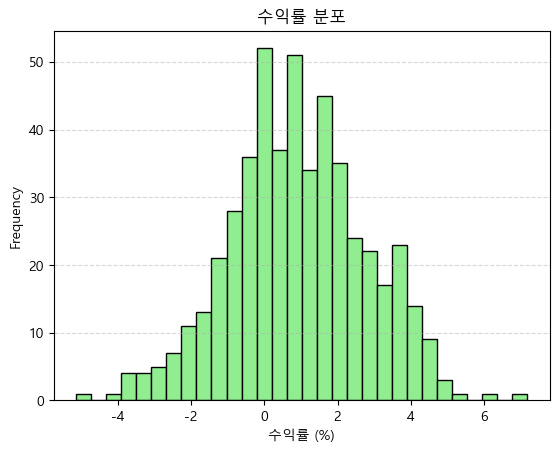

In [5]:
import pandas as pd

# 수익률 데이터 예시
returns = pd.Series(np.random.randn(500) * 2 + 1)

# 히스토그램
returns.plot(kind='hist', bins=30, color='lightgreen', edgecolor='black', title="수익률 분포")
plt.xlabel("수익률 (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


### 1- 3 Seaborn 스타일 히스토그램 

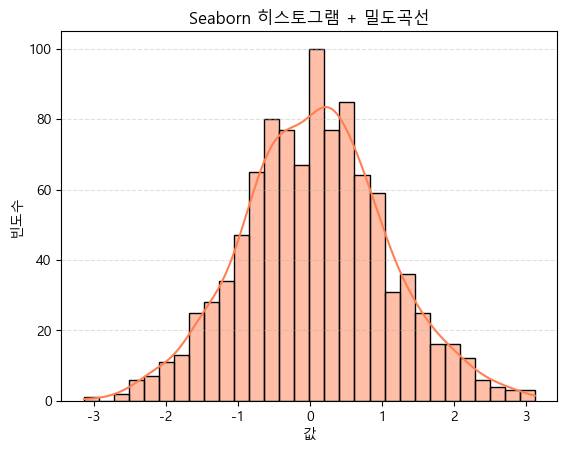

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
data = np.random.normal(0, 1, 1000)

# seaborn 히스토그램 + KDE
sns.histplot(data, bins=30, kde=True, color="coral")

plt.title("Seaborn 히스토그램 + 밀도곡선")
plt.xlabel("값")
plt.ylabel("빈도수")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()


### 1-4 삼성전자 수익률 히스토그램 (pykrx 활용)

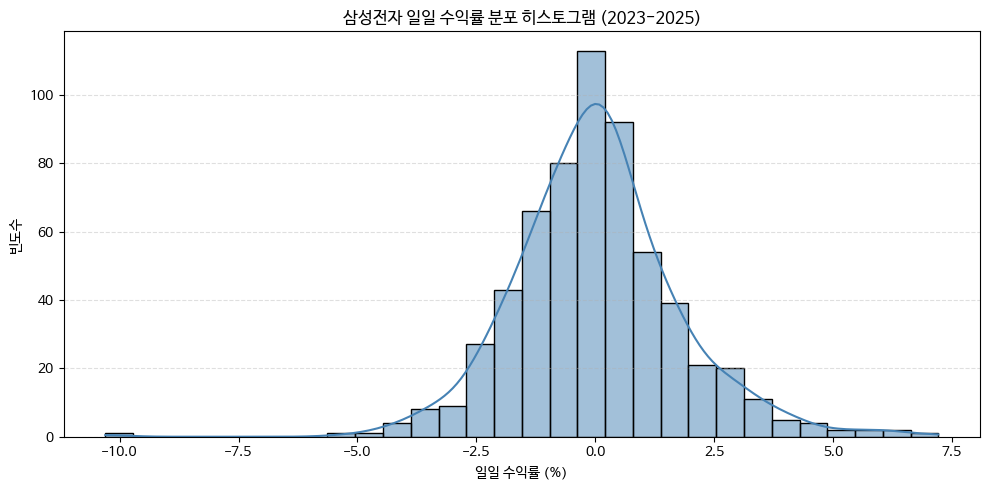

In [9]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 삼성전자 일별 종가 불러오기
df = stock.get_market_ohlcv_by_date("2023-01-01", "2025-06-30", "005930")
df['수익률'] = df['종가'].pct_change() * 100
df = df.dropna()

# 히스토그램 + KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['수익률'], bins=30, kde=True, color="steelblue")

plt.title("삼성전자 일일 수익률 분포 히스토그램 (2023-2025)")
plt.xlabel("일일 수익률 (%)")
plt.ylabel("빈도수")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 2. 종목별 수익률 히스토그램 비교 (Seaborn + hue)

In [ ]:
#삼성전자(005930), SK하이닉스(000660), 현대차(005380), LG에너지솔루션(373220)

In [ ]:
# 항목	설명
# hue='종목'	각 종목별 색상 구분
# kde=True	커널 밀도곡선으로 분포 형태 부드럽게 표시
# stat='density'	빈도수 대신 밀도 기반 비교
# common_norm=False	각 종목의 밀도 개별 정규화 (변동성 차이 잘 드러남)

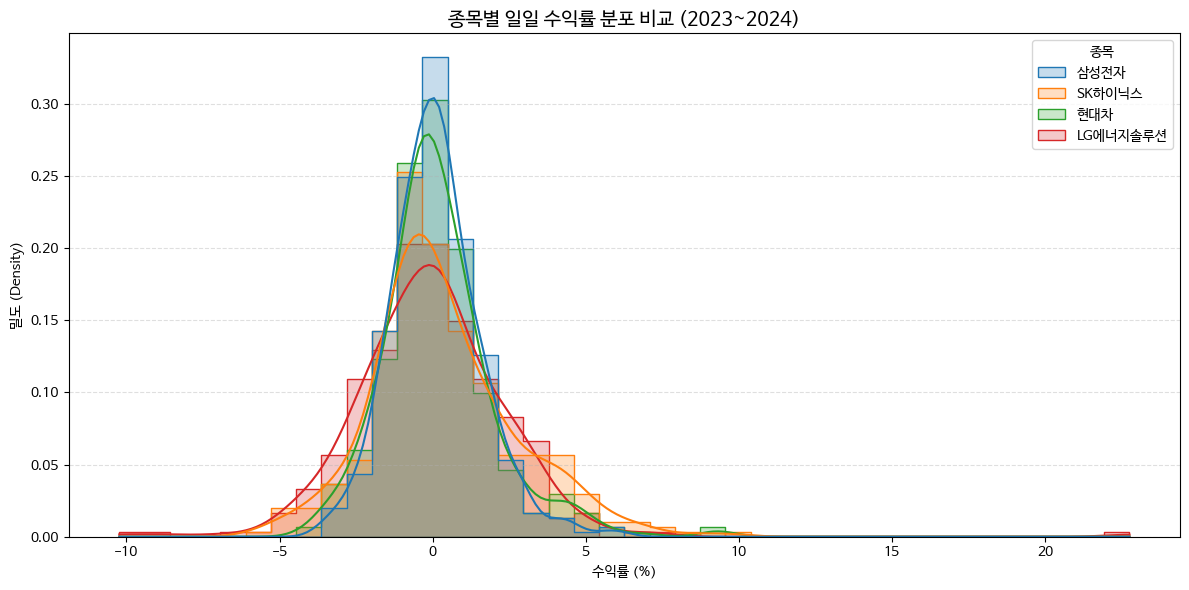

In [10]:
from pykrx import stock
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ▶️ 1. 수익률 계산 함수
def get_returns(code, name):
    df = stock.get_market_ohlcv_by_date("2023-01-01", "2024-06-30", code)
    df.index = pd.to_datetime(df.index)
    df['수익률'] = df['종가'].pct_change() * 100
    df['종목'] = name
    return df[['수익률', '종목']].dropna()

# ▶️ 2. 종목별 수익률 데이터 가져오기
samsung = get_returns("005930", "삼성전자")
skhynix = get_returns("000660", "SK하이닉스")
hyundai = get_returns("005380", "현대차")
lgenergy = get_returns("373220", "LG에너지솔루션")

# ▶️ 3. 데이터 병합
merged_df = pd.concat([samsung, skhynix, hyundai, lgenergy], ignore_index=True)

# ▶️ 4. Seaborn 히스토그램 with hue
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_df, x='수익률', hue='종목', bins=40, kde=True, element='step', stat='density', common_norm=False)

# ▶️ 5. 꾸미기
plt.title("종목별 일일 수익률 분포 비교 (2023~2024)", fontsize=14)
plt.xlabel("수익률 (%)")
plt.ylabel("밀도 (Density)")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
